In [1]:
# Imports
from pgmpy.factors.discrete import TabularCPD
import numpy as np
from pgmpy.models import BayesianModel


In [21]:
# Defining the Network
edges_list = [
    [('x1','x2'),
    ('x1','x4'),
    ('x1','x6')],
    [('x2','x3'),
    ('x2','x5')],
    [('x3','x2'),
    ('x3','x5'),
    ('x3','x6')]
]

nodes_list = [
    {
        'x1':{
            'States': {
                '0':{},
                '1':{},
                '2':{},
                '3':{}
            }
        },
        'x2':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{},
            '4':{}
        }
        },
        'x4':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{}
        }
        },
        'x6':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{},
            '4':{}
        }
        }
    },
    {
        'x2':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{},
            '4':{}
        }
        },
        'x3':{
        'States':{
            '0':{},
            '1':{},
            '2':{}
        }
        },
        'x5':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{}
        }
        }
    },
    {
        'x2':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{},
            '4':{}
        }
        },
        'x3':{
        'States':{
            '0':{},
            '1':{},
            '2':{}
        }
        },
        'x5':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{}
        }
        },
        'x6':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{},
            '4':{}
        }
        }
    }
]

cpds_list = [
    [
        {
        #Given x2 given x1
        'Values': np.array([[36, 2, 5, 12],
                           [57, 0, 1, 6],
                           [4, 0, 0, 1],
                           [27, 0, 2, 5],
                           [32, 1, 3, 6]]),
        'Variables':{'x2':['x1']}
        },
        {
        'Values': np.array([[115,3,8,17],
                           [12,0,3,6],
                           [2,0,0,0],
                           [27,0,0,7]]),
        'Variables':{'x4':['x1']}
        },
        {
        'Values': np.array([[3,0,0,0],
                            [44,2,6,12],
                            [20,1,1,6],
                            [55,0,2,6],
                            [34,0,2,6]]),
        'Variables':{'x6':['x1']}
        }
    ],
    [
        # Given x2
        {
        'Values':np.array([[7,17,1,6,5],
                              [41,42,4,24,21],
                              [7,5,0,4,16]]),
        'Variables':{'x3':['x2']}
        },
        {
        'Values':np.array([[23,22,3,13,14],
                           [4,7,2,5,4],
                           [6,8,0,4,3],
                           [22,27,0,12,21]]),
        'Variables':{'x5':['x2']}
        }
    ],
    [
        # Given x3
        {
        'Values':np.array([[7,41,7],
                          [17,42,5],
                          [1,4,0],
                          [6,24,4],
                          [5,5,16]]),
        'Variables':{'x2':['x3']}
        },
        {
        'Values':np.array([[13,52,10],
                          [3,15,4],
                          [8,12,1],
                          [12,53,17]]),
        'Variables':{'x5':['x3']}
        },
        {
        'Values':np.array([[0,3,0],
                          [14,42,8],
                          [3,20,5],
                          [13,40,10],
                          [6,27,9]]),
        'Variables':{'x6':['x3']}
        }
    ]
]

for item in cpds_list:
    for cpd in item:
        cpd['Values'] = cpd['Values']/200
    
# Marginal Dist
marginal_list = {
    "x1":np.array([156,3,11,30]),
    "x2":np.array([55,64,5,34,42]),
    "x3":np.array([36,132,32]),
    "x4":np.array([143,21,2,34]),
    "x5":np.array([75,22,21,82]),
    "x6":np.array([3,64,28,63,42])
}

In [22]:
table = 2
_edges = edges_list[table]
_nodes = nodes_list[table]
_cpds = cpds_list[table]
model = BayesianModel(_edges)

for node in _nodes:
    #model.node[node] = nodes[node]
    model.node[node].update(_nodes[node])

tabular_cpds = []
for cpd in _cpds:
    var = list(cpd['Variables'].keys())[0]
    evidence = cpd['Variables'][var]
    values = cpd['Values']
    states = len(_nodes[var]['States'])
    evidence_card = [len(_nodes[evidence_var]['States'])
                     for evidence_var in evidence]
    tabular_cpds.append(
        TabularCPD(var, states, values, evidence, evidence_card))

model.add_cpds(*tabular_cpds)


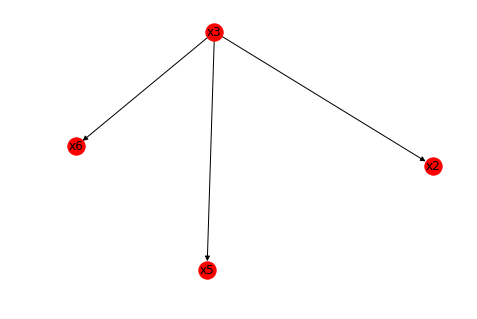

In [23]:
import networkx as nx
import pylab as plt
nx.draw(model, with_labels=True)
plt.show()

In [24]:
for cpd in model.cpds:
    print(cpd)

+------+-------+-------+-------+
| x3   | x3_0  | x3_1  | x3_2  |
+------+-------+-------+-------+
| x2_0 | 0.035 | 0.205 | 0.035 |
+------+-------+-------+-------+
| x2_1 | 0.085 | 0.21  | 0.025 |
+------+-------+-------+-------+
| x2_2 | 0.005 | 0.02  | 0.0   |
+------+-------+-------+-------+
| x2_3 | 0.03  | 0.12  | 0.02  |
+------+-------+-------+-------+
| x2_4 | 0.025 | 0.025 | 0.08  |
+------+-------+-------+-------+
+------+-------+-------+-------+
| x3   | x3_0  | x3_1  | x3_2  |
+------+-------+-------+-------+
| x5_0 | 0.065 | 0.26  | 0.05  |
+------+-------+-------+-------+
| x5_1 | 0.015 | 0.075 | 0.02  |
+------+-------+-------+-------+
| x5_2 | 0.04  | 0.06  | 0.005 |
+------+-------+-------+-------+
| x5_3 | 0.06  | 0.265 | 0.085 |
+------+-------+-------+-------+
+------+-------+-------+-------+
| x3   | x3_0  | x3_1  | x3_2  |
+------+-------+-------+-------+
| x6_0 | 0.0   | 0.015 | 0.0   |
+------+-------+-------+-------+
| x6_1 | 0.07  | 0.21  | 0.04  |
+------+--

In [30]:
# Local Independencies Don't know correct or not
#model.local_independencies('x2')

(x2 _|_ x5, x6 | x3)

In [26]:
# Independencies based on D-seperation properties
#model.get_independencies()

(x2 _|_ x5, x6 | x3)
(x2 _|_ x5 | x3, x6)
(x2 _|_ x6 | x3, x5)
(x5 _|_ x2, x6 | x3)
(x5 _|_ x6 | x3, x2)
(x5 _|_ x2 | x3, x6)
(x6 _|_ x5, x2 | x3)
(x6 _|_ x5 | x3, x2)
(x6 _|_ x2 | x3, x5)

In [27]:
# Joint between two variables
# If independence test returns false then two variables are not independent
def independence_test(stateA,stateB,cpd_val):
    stateA = int(stateA)
    stateB = int(stateB)
    prob_A_given_B = cpd_val[stateB][stateA]
    marginal_B = cpd_val[stateB].sum()
    lhs = np.multiply(prob_A_given_B,marginal_B)
    marginal_A = cpd_val[:,stateA].sum()
    rhs = np.multiply(marginal_A,marginal_B)
    return np.abs((lhs-rhs))


In [28]:
for cpd in _cpds:
    varA = list(cpd["Variables"].keys())[0]
    condVar = list(cpd["Variables"].values())[0][0]
    cpd_val = cpd['Values']
    print(varA,"given",condVar)
    linf = []
    for stateB in _nodes[varA]['States'].keys():
        for stateA in _nodes[condVar]['States'].keys():
            linf.append(independence_test(stateA,stateB,cpd_val))
    print(np.max(linf))

x2 given x3
0.11839999999999999
x5 given x3
0.16194999999999998
x6 given x3
0.14489999999999997
